In [1]:
import os
import glob
import pandas as pd

In [3]:
parent_dir = r"../data/54ft/"
output_filename_pattern = r"*_test_result.csv"

In [6]:
test_result_csv_paths = glob.glob(os.path.join(parent_dir, output_filename_pattern))

In [96]:
def get_dfs(paths):
    all_dfs = []
    for path in paths:
        all_dfs.append(pd.read_csv(path))
    return all_dfs

In [97]:
dfs = get_dfs(test_result_csv_paths)

In [99]:
for df in dfs[1:]:
    dfs[0][df.columns[-1]] = df[df.columns[-1]]

merged = dfs[0].copy()
merged

,instance_date,instance_time,Prediction Is_Adhoc,Prediction Is_Bus_stop,Prediction Is_Congestion,Prediction Is_Signal,Prediction Is_Turn
0,07/01/2019,08:57:28,Adhoc,Not Bus_stop,Not Congestion,Not Signal,Not Turn
1,07/01/2019,09:05:59,Adhoc,Not Bus_stop,Not Congestion,Not Signal,Not Turn
2,07/01/2019,09:06:27,Adhoc,Not Bus_stop,Not Congestion,Not Signal,Not Turn
3,07/01/2019,09:06:58,Not Adhoc,Bus_stop,Not Congestion,Not Signal,Not Turn
4,07/01/2019,09:09:22,Not Adhoc,Bus_stop,Not Congestion,Not Signal,Not Turn
...,...,...,...,...,...,...,...
1565,09/03/2019,13:28:15,Not Adhoc,Bus_stop,Not Congestion,Not Signal,Not Turn
1566,09/03/2019,13:29:12,Not Adhoc,Bus_stop,Not Congestion,Not Signal,Not Turn
1567,09/03/2019,13:31:27,Not Adhoc,Not Bus_stop,Not Congestion,Not Signal,Not Turn
1568,09/03/2019,13:31:43,Not Adhoc,Not Bus_stop,Not Congestion,Not Signal,Not Turn


# Anamoly Start

In [118]:
df1 = pd.read_csv(test_result_csv_paths[0])
df2 = pd.read_csv(test_result_csv_paths[1])
print(df1.shape)
df1.shape == df2.shape

(1570, 3)


True

In [119]:
df1[df1.duplicated(["instance_date", "instance_time"], keep=False)]

,instance_date,instance_time,Prediction Is_Adhoc
509,07/02/2019,11:41:56,Not Adhoc
676,07/02/2019,11:41:56,Not Adhoc
1278,07/06/2019,09:11:15,Not Adhoc
1293,07/06/2019,09:11:15,Not Adhoc


In [120]:
df2[df2.duplicated(["instance_date", "instance_time"],keep=False)]

,instance_date,instance_time,Prediction Is_Bus_stop
509,07/02/2019,11:41:56,Not Bus_stop
676,07/02/2019,11:41:56,Bus_stop
1278,07/06/2019,09:11:15,Not Bus_stop
1293,07/06/2019,09:11:15,Bus_stop


In [121]:
test_df = pd.read_csv("../data/54ft/54ft_test.csv")
test_df.shape

(1570, 33)

In [122]:
test_df[test_df.duplicated(["start_date", "start_time"], keep=False)]

,Unnamed: 0,lat,long,stay_duration,start_date,start_time,end_date,end_time,wifi_count,edge_wifi_count,...,school,two_way,water,RSI,Is_Bus_stop,Is_Signal,Is_Turn,Is_Congestion,Is_Adhoc,image_path
509,170,23.540756,87.288946,14,07/02/2019,11:41:56,07/02/2019,11:42:09,1,1,...,0.000000,0.099253,0.019354,1.311522,Not Bus_stop,Not Signal,Not Turn,Not Congestion,Adhoc,./Trails/down/02-07-2019_DATA_11_11_23/images/...
676,2145,23.504341,87.308181,27,07/02/2019,11:41:56,07/02/2019,11:42:23,5,4,...,0.000000,0.065537,0.000000,1.543640,Not Bus_stop,Not Signal,Not Turn,Not Congestion,Adhoc,./Trails/up/02-07-2019_DATA_10_58_35/images/Tr...
1278,2821,23.507157,87.309917,7,07/06/2019,09:11:15,07/06/2019,09:11:21,0,1,...,0.000000,0.063106,0.000000,1.163659,Bus_stop,Not Signal,Not Turn,Not Congestion,Not Adhoc,./Trails/up/06-07-2019_DATA_08_40_03/images/Tr...
1293,2836,23.552328,87.286878,5,07/06/2019,09:11:15,07/06/2019,09:11:21,1,0,...,0.262977,0.000000,0.012928,4.379656,Bus_stop,Not Signal,Not Turn,Not Congestion,Not Adhoc,./Trails/up/06-07-2019_DATA_08_57_09/images/Tr...


In [123]:
main_df = pd.read_csv("../data/54ft/Processed_Bus_Trail_data.csv")
main_df.shape

(3840, 32)

In [124]:
main_df[main_df.duplicated(["start_date", "start_time"], keep=False)]

,lat,long,stay_duration,start_date,start_time,end_date,end_time,wifi_count,edge_wifi_count,honk_duration,...,school,two_way,water,RSI,Is_Bus_stop,Is_Signal,Is_Turn,Is_Congestion,Is_Adhoc,image_path
170,23.540756,87.288946,14,07/02/2019,11:41:56,07/02/2019,11:42:09,1,1,0,...,0.000000,0.099253,0.019354,1.311522,Not Bus_stop,Not Signal,Not Turn,Not Congestion,Adhoc,./Trails/down/02-07-2019_DATA_11_11_23/images/...
2145,23.504341,87.308181,27,07/02/2019,11:41:56,07/02/2019,11:42:23,5,4,20,...,0.000000,0.065537,0.000000,1.543640,Not Bus_stop,Not Signal,Not Turn,Not Congestion,Adhoc,./Trails/up/02-07-2019_DATA_10_58_35/images/Tr...
2821,23.507157,87.309917,7,07/06/2019,09:11:15,07/06/2019,09:11:21,0,1,0,...,0.000000,0.063106,0.000000,1.163659,Bus_stop,Not Signal,Not Turn,Not Congestion,Not Adhoc,./Trails/up/06-07-2019_DATA_08_40_03/images/Tr...
2836,23.552328,87.286878,5,07/06/2019,09:11:15,07/06/2019,09:11:21,1,0,0,...,0.262977,0.000000,0.012928,4.379656,Bus_stop,Not Signal,Not Turn,Not Congestion,Not Adhoc,./Trails/up/06-07-2019_DATA_08_57_09/images/Tr...


# Anamoly End

In [34]:
df = pd.read_csv(test_result_csv_paths[0])
df2 = pd.read_csv(test_result_csv_paths[1])
df.shape == df2.shape

True

In [35]:
df.set_index(["instance_date", "instance_time"])

Prediction Is_Adhoc
instance_date instance_time                    
07/01/2019    08:57:28                    Adhoc
              09:05:59                    Adhoc
              09:06:27                    Adhoc
              09:06:58                Not Adhoc
              09:09:22                Not Adhoc
...                                         ...
09/03/2019    13:28:15                Not Adhoc
              13:29:12                Not Adhoc
              13:31:27                Not Adhoc
              13:31:43                Not Adhoc
              13:32:39                    Adhoc

[1570 rows x 1 columns]

In [36]:

df2.set_index(["instance_date", "instance_time"])

Prediction Is_Bus_stop
instance_date instance_time                       
07/01/2019    08:57:28                Not Bus_stop
              09:05:59                Not Bus_stop
              09:06:27                Not Bus_stop
              09:06:58                    Bus_stop
              09:09:22                    Bus_stop
...                                            ...
09/03/2019    13:28:15                    Bus_stop
              13:29:12                    Bus_stop
              13:31:27                Not Bus_stop
              13:31:43                Not Bus_stop
              13:32:39                Not Bus_stop

[1570 rows x 1 columns]

In [37]:
# merged = df.merge(df2, left_on=["instance_date", "instance_time"], right_on=["instance_date", "instance_time"])
merged = df.merge(df2, how="outer")
merged

,instance_date,instance_time,Prediction Is_Adhoc,Prediction Is_Bus_stop
0,07/01/2019,08:57:28,Adhoc,Not Bus_stop
1,07/01/2019,09:05:59,Adhoc,Not Bus_stop
2,07/01/2019,09:06:27,Adhoc,Not Bus_stop
3,07/01/2019,09:06:58,Not Adhoc,Bus_stop
4,07/01/2019,09:09:22,Not Adhoc,Bus_stop
...,...,...,...,...
1569,09/03/2019,13:28:15,Not Adhoc,Bus_stop
1570,09/03/2019,13:29:12,Not Adhoc,Bus_stop
1571,09/03/2019,13:31:27,Not Adhoc,Not Bus_stop
1572,09/03/2019,13:31:43,Not Adhoc,Not Bus_stop


In [76]:
f = df.instance_time
g = merged.instance_time

In [81]:
for i, j in enumerate(f):
    if g[i] != j:
        print(g[i])
        print(i)

11:41:56
510
11:41:56
511
11:41:56
512
11:42:20
513
11:42:37
514
11:42:48
515
11:43:21
516
11:44:12
517
11:45:23
518
11:46:01
519
11:46:21
520
11:46:34
521
11:47:07
522
11:48:13
523
11:49:11
524
11:49:26
525
11:50:35
526
11:52:22
527
11:52:46
528
11:53:12
529
11:53:58
530
11:55:30
531
11:56:35
532
11:57:19
533
11:57:48
534
12:06:12
535
12:09:05
536
12:10:16
537
12:11:14
538
12:13:06
539
12:15:10
540
12:18:19
541
12:18:43
542
12:20:11
543
12:23:08
544
12:24:16
545
12:28:09
546
12:29:26
547
12:30:20
548
12:31:03
549
12:31:45
550
12:32:33
551
12:32:55
552
12:34:11
553
12:34:51
554
12:35:21
555
12:36:28
556
12:37:03
557
12:37:21
558
12:37:41
559
12:38:11
560
12:38:55
561
12:40:38
562
12:41:08
563
12:41:41
564
12:42:08
565
12:42:51
566
12:44:27
567
07:05:30
568
07:06:10
569
07:07:46
570
07:11:15
571
07:11:49
572
07:12:21
573
07:13:54
574
07:14:38
575
07:15:07
576
07:15:29
577
07:15:58
578
07:17:57
579
07:18:44
580
07:19:25
581
07:19:45
582
07:20:29
583
07:20:46
584
07:22:57
585
07:24:00
586

14:17:40
1464
14:18:19
1465
14:18:44
1466
14:19:01
1467
14:19:26
1468
14:20:07
1469
14:21:29
1470
14:21:36
1471
14:22:13
1472
14:22:32
1473
14:23:01
1474
14:23:21
1475
14:24:39
1476
18:39:08
1477
18:44:29
1478
18:45:01
1479
18:46:02
1480
18:47:08
1481
18:48:26
1482
18:48:41
1483
18:49:20
1484
18:51:20
1485
18:51:41
1486
18:53:38
1487
18:55:08
1488
18:55:35
1489
18:56:44
1490
18:58:02
1491
18:58:13
1492
18:58:48
1493
18:59:21
1494
18:59:51
1495
19:00:08
1496
19:01:58
1497
19:04:44
1498
19:06:12
1499
19:07:26
1500
19:09:16
1501
19:10:44
1502
19:11:44
1503
19:12:18
1504
19:13:42
1505
19:14:28
1506
19:14:49
1507
19:15:26
1508
19:15:39
1509
19:16:07
1510
19:16:28
1511
19:17:04
1512
19:17:56
1513
19:19:02
1514
19:19:35
1515
19:20:34
1516
19:21:07
1517
19:21:30
1518
19:22:08
1519
19:22:26
1520
19:23:20
1521
19:23:50
1522
19:24:26
1523
19:24:52
1524
19:25:34
1525
19:26:44
1526
19:28:13
1527
19:28:44
1528
12:40:00
1529
12:41:45
1530
12:42:03
1531
12:42:15
1532
12:43:04
1533
12:44:40
1534
12:45:

In [88]:
merged.iloc[500:511, ]

,instance_date,instance_time,Prediction Is_Adhoc,Prediction Is_Bus_stop
500,07/02/2019,11:26:56,Not Adhoc,Not Bus_stop
501,07/02/2019,11:28:34,Not Adhoc,Bus_stop
502,07/02/2019,11:30:42,Adhoc,Not Bus_stop
503,07/02/2019,11:31:11,Not Adhoc,Not Bus_stop
504,07/02/2019,11:32:04,Not Adhoc,Bus_stop
505,07/02/2019,11:33:52,Not Adhoc,Bus_stop
506,07/02/2019,11:35:08,Not Adhoc,Not Bus_stop
507,07/02/2019,11:41:01,Not Adhoc,Not Bus_stop
508,07/02/2019,11:41:13,Not Adhoc,Bus_stop
509,07/02/2019,11:41:56,Not Adhoc,Not Bus_stop


In [89]:
df.iloc[500:511, ]

,instance_date,instance_time,Prediction Is_Adhoc
500,07/02/2019,11:26:56,Not Adhoc
501,07/02/2019,11:28:34,Not Adhoc
502,07/02/2019,11:30:42,Adhoc
503,07/02/2019,11:31:11,Not Adhoc
504,07/02/2019,11:32:04,Not Adhoc
505,07/02/2019,11:33:52,Not Adhoc
506,07/02/2019,11:35:08,Not Adhoc
507,07/02/2019,11:41:01,Not Adhoc
508,07/02/2019,11:41:13,Not Adhoc
509,07/02/2019,11:41:56,Not Adhoc


In [90]:
df2.iloc[500:511, ]

,instance_date,instance_time,Prediction Is_Bus_stop
500,07/02/2019,11:26:56,Not Bus_stop
501,07/02/2019,11:28:34,Bus_stop
502,07/02/2019,11:30:42,Not Bus_stop
503,07/02/2019,11:31:11,Not Bus_stop
504,07/02/2019,11:32:04,Bus_stop
505,07/02/2019,11:33:52,Bus_stop
506,07/02/2019,11:35:08,Not Bus_stop
507,07/02/2019,11:41:01,Not Bus_stop
508,07/02/2019,11:41:13,Bus_stop
509,07/02/2019,11:41:56,Not Bus_stop


In [50]:
for l in ls:
    if not l:
        print(l)
print("all")

all


In [94]:
df[df2.columns[-1]] = df2[df2.columns[-1]]

In [95]:
df

,instance_date,instance_time,Prediction Is_Adhoc,t,Prediction Is_Bus_stop
0,07/01/2019,08:57:28,Adhoc,Not Bus_stop,Not Bus_stop
1,07/01/2019,09:05:59,Adhoc,Not Bus_stop,Not Bus_stop
2,07/01/2019,09:06:27,Adhoc,Not Bus_stop,Not Bus_stop
3,07/01/2019,09:06:58,Not Adhoc,Bus_stop,Bus_stop
4,07/01/2019,09:09:22,Not Adhoc,Bus_stop,Bus_stop
...,...,...,...,...,...
1565,09/03/2019,13:28:15,Not Adhoc,Bus_stop,Bus_stop
1566,09/03/2019,13:29:12,Not Adhoc,Bus_stop,Bus_stop
1567,09/03/2019,13:31:27,Not Adhoc,Not Bus_stop,Not Bus_stop
1568,09/03/2019,13:31:43,Not Adhoc,Not Bus_stop,Not Bus_stop


In [66]:
a = pd.DataFrame({"A": [1,2], "B":[1,2], "C": [1, 2]}, index=[0,1])
print(a.shape)
a

(2, 3)


,A,B,C
0,1,1,1
1,2,2,2


In [64]:
b = pd.DataFrame({"A": [1,2], "B":[1,2], "D": [1, 2]}, index=[0,1])
print(b.shape)
b

(2, 3)


,A,B,D
0,1,1,1
1,2,2,2


In [62]:
c = a.merge(b, left_on=["A", "B"], right_on=["A", "B"])
print(c.shape)
c

(2, 4)


,A,B,C,D
0,1,1,1,1
1,2,2,2,2


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

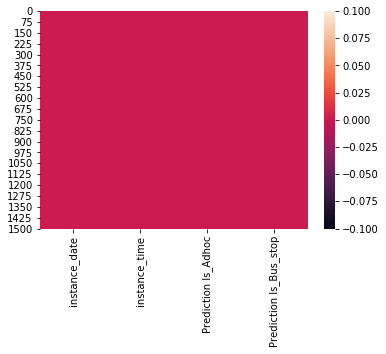

In [25]:
sns.heatmap(merged.isnull())

In [ ]:
f"{poi_column}"